In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
diamond = sns.load_dataset("diamonds")
diamond.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


carat – Diamond weight in carats (numeric).

cut – Quality of the cut (Fair → Ideal) (categorical, ordered).

color – Color grade (J → D) (categorical, ordered).

clarity – Internal flaws (I1 → IF) (categorical, ordered).

depth – Total depth percentage (numeric).

table – Width of top facet relative to average width (%) (numeric).

price – Price in US dollars (numeric).

x – Length in mm (numeric).

y – Width in mm (numeric).

z – Height in mm (numeric).

In [4]:
diamond.groupby("cut").price.mean()

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [5]:
diamond.groupby("color").price.max()

color
D    18693
E    18731
F    18791
G    18818
H    18803
I    18823
J    18710
Name: price, dtype: int64

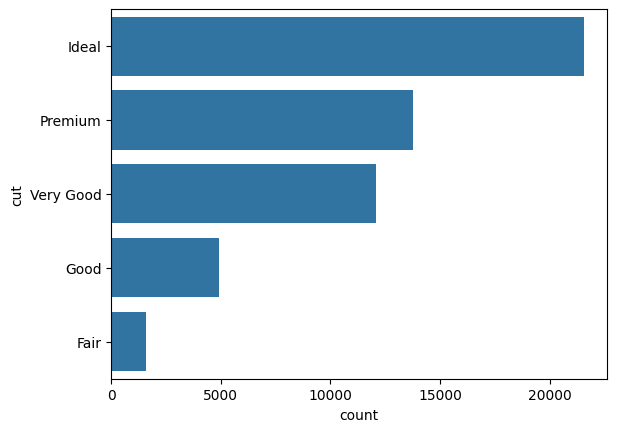

In [6]:
plot = sns.countplot(diamond['cut'])

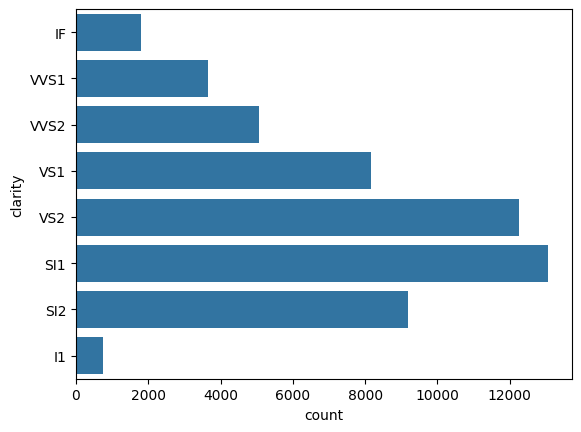

In [7]:
plot = sns.countplot(diamond['clarity'])

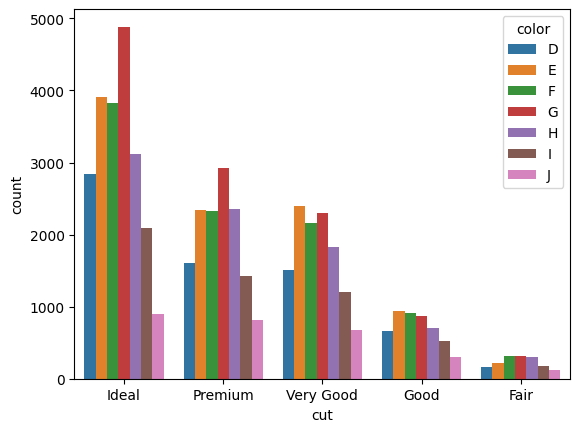

In [8]:
plot = sns.countplot(x ="cut", data = diamond, hue = "color")

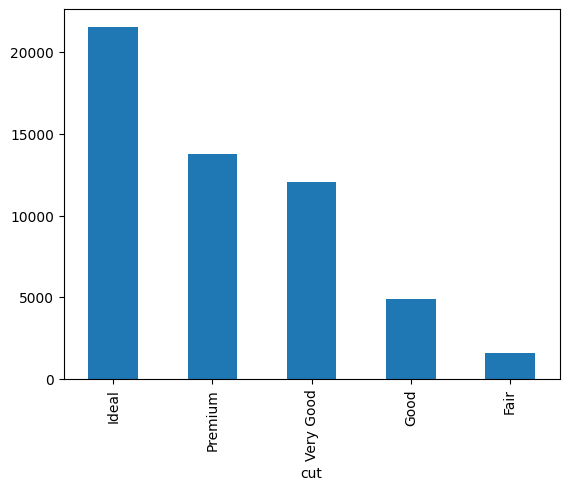

In [9]:
plot = diamond["cut"].value_counts().plot(kind = "bar")

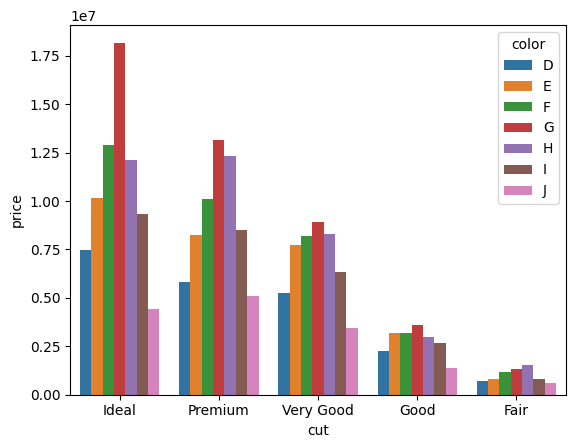

In [10]:
# bar plot:

plot = sns.barplot(x = 'cut',
                   y = 'price',
                   data = diamond,
                   estimator= sum,
                   errorbar = None,
                   hue = "color")

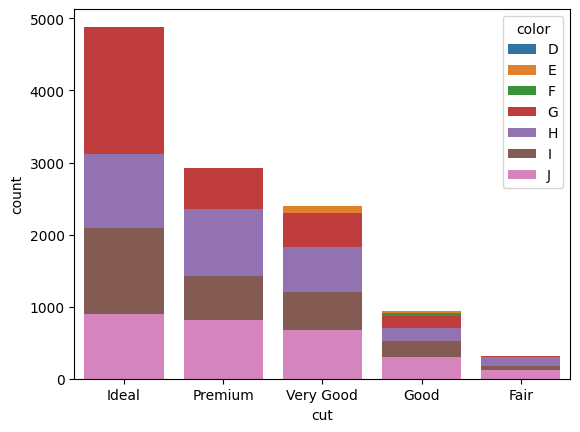

In [11]:
plot = sns.countplot(x = "cut", hue = "color",
                     data = diamond, dodge= False)

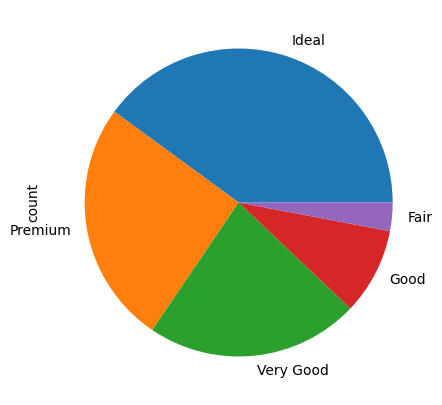

In [12]:
pie_data = diamond["cut"].value_counts()

plot = pie_data.plot(kind ='pie',
                     subplots=True,
                     figsize=(5,5))
plt.show()

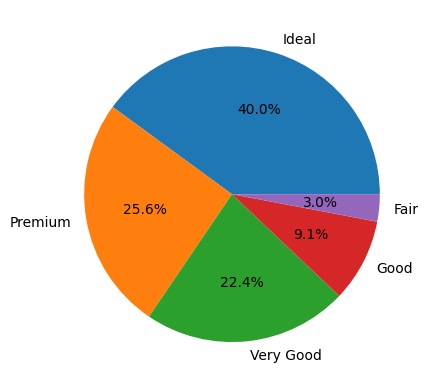

In [13]:
pie_data = diamond["cut"].value_counts()

plt.pie(pie_data.values,
        labels = pie_data.index,
        autopct="%.1f%%")
plt.show()

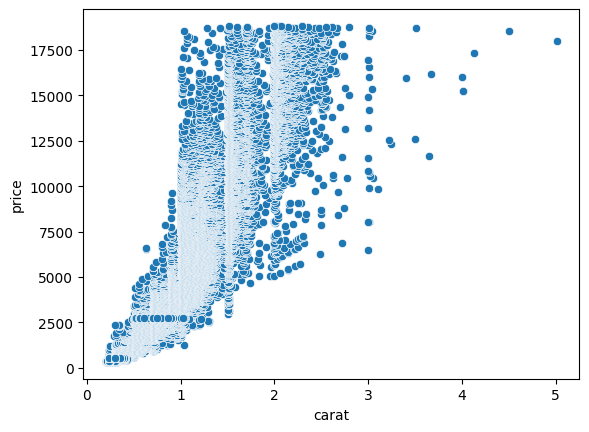

In [14]:
plot = sns.scatterplot(x = "carat", y = "price", data = diamond)

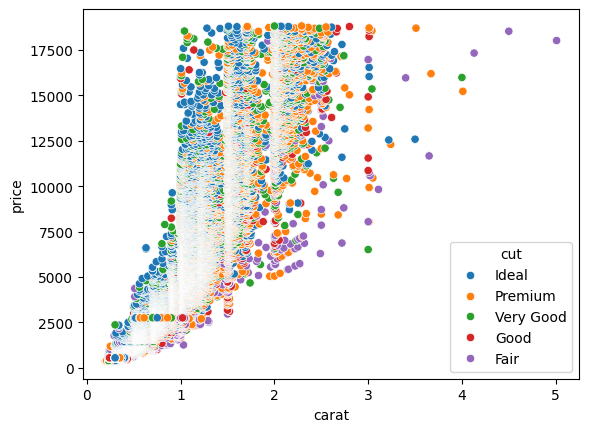

In [15]:
plot = sns.scatterplot(x = "carat",
                       y = "price",
                       hue = "cut",
                       data = diamond)

Text(0.5, 0, 'color')

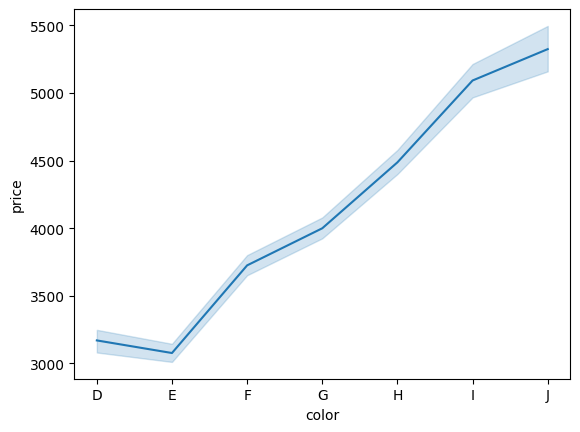

In [16]:
plot = sns.lineplot(x = "color",
                    y = "price",
                    data = diamond)
plot.set_xlabel("color")

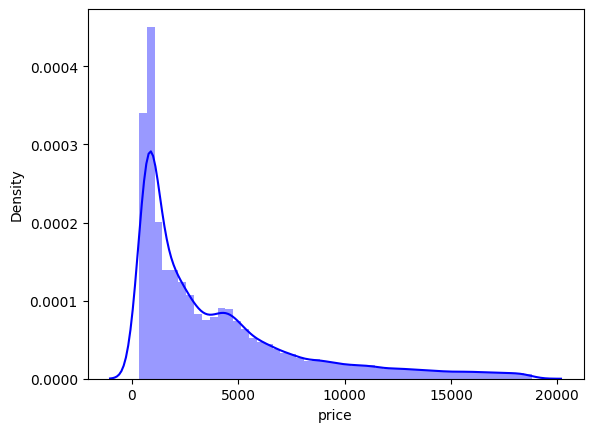

In [17]:
plot = sns.distplot(diamond["price"],
                    hist=True,
                    kde = True,
                    color="blue")

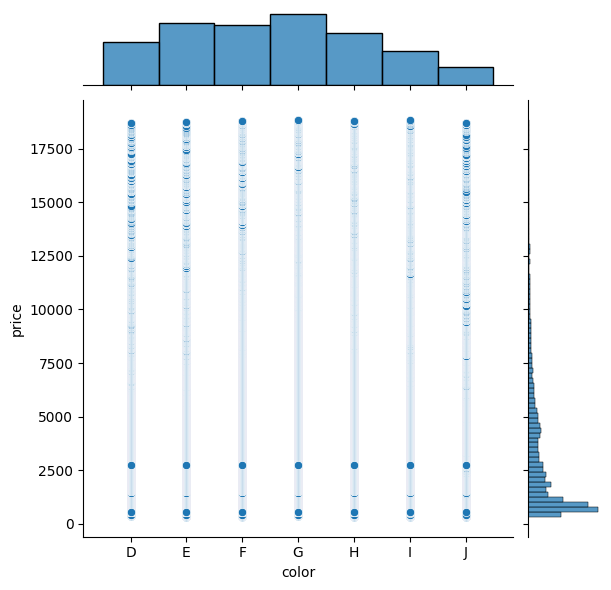

In [18]:
plot = sns.jointplot(x = "color",
                     y = "price", 
                     data = diamond)

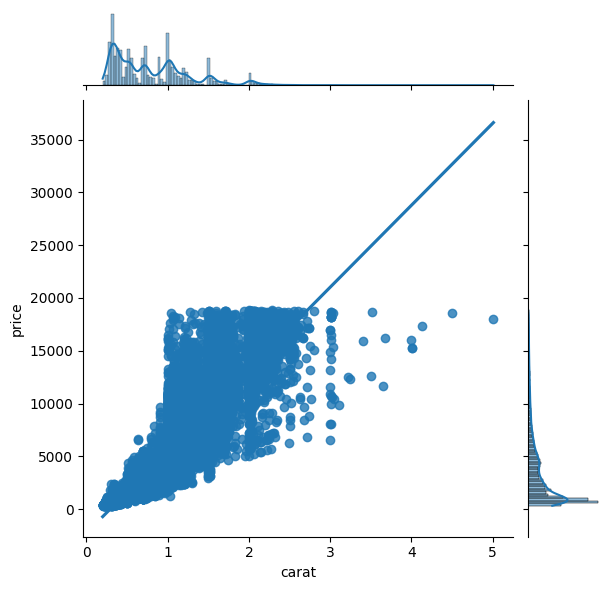

In [19]:
plot = sns.jointplot(x = "carat", y = "price",
                     data = diamond,
                     kind = "reg")

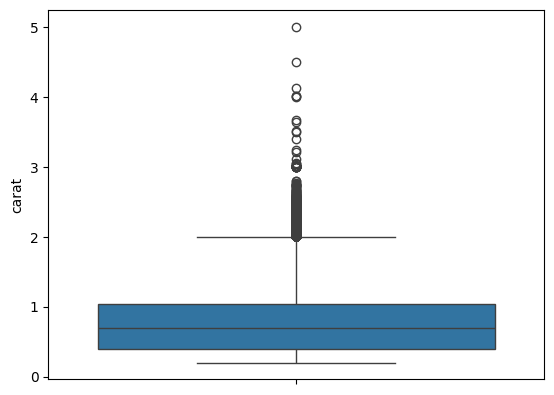

In [20]:
plot = sns.boxplot(diamond["carat"])

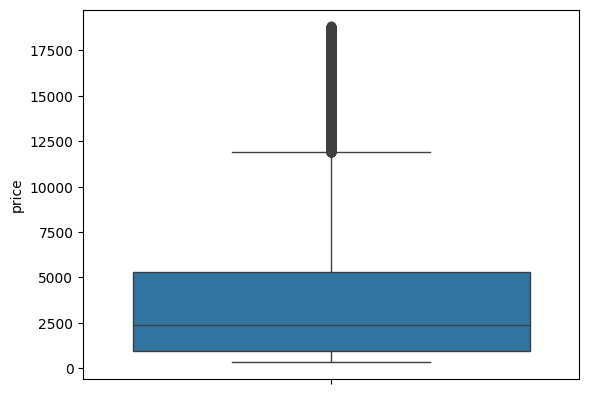

In [21]:
plot = sns.boxplot(diamond["price"])

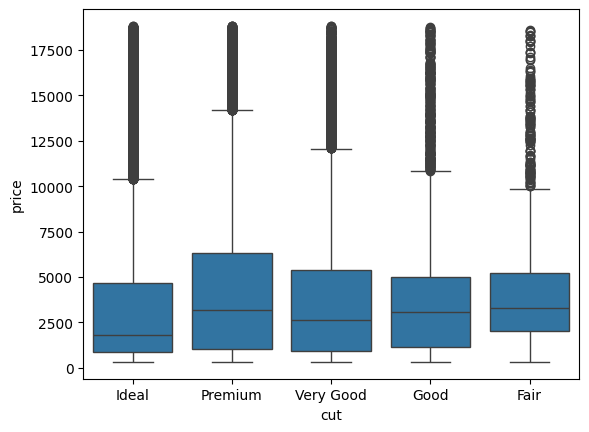

In [22]:
plot = sns.boxplot(x = "cut", y = "price",
                   data = diamond)

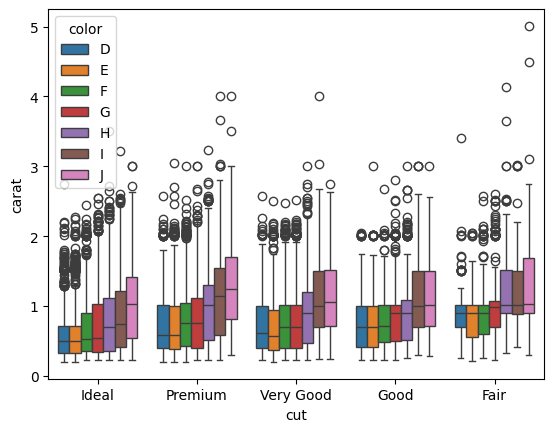

In [23]:
plot = sns.boxplot(x = "cut", y = "carat",
                   data = diamond, hue = "color")

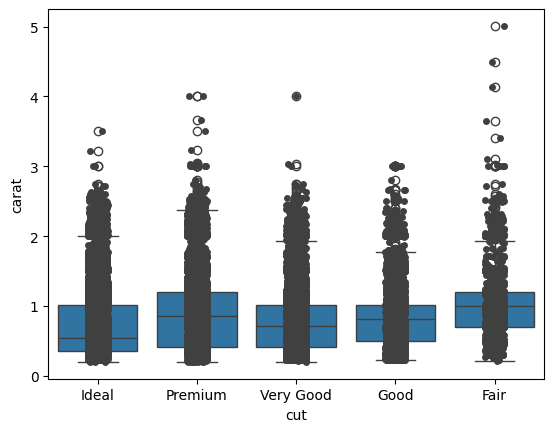

In [24]:

plot = sns.boxplot(x = "cut", y = "carat",
                   data = diamond)
plot = sns.stripplot(x = "cut", y = "carat",
                   data = diamond, color = ".25")

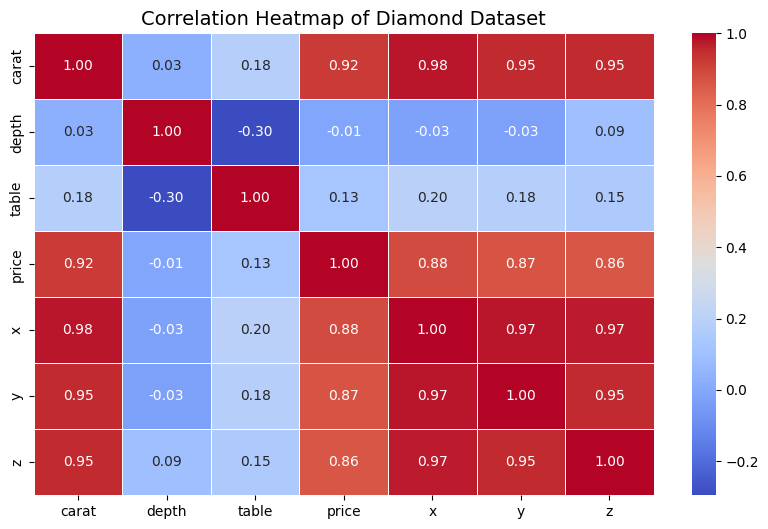

In [25]:

# Select only numeric columns for correlation analysis
numeric_data = diamond.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numeric_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation,             # Data for the heatmap
            annot=True,       # Show correlation values on the cells
            cmap='coolwarm',  # Color map for better visual contrast
            fmt=".2f",        # Format correlation values to 2 decimal places
            linewidths=0.5)   # Add space between cells for clarity

plt.title("Correlation Heatmap of Diamond Dataset", fontsize=14)
plt.show()


In [33]:
corr_mtx = diamond.corr(numeric_only=True)
corr_mtx.tail(3)

,carat,depth,table,price,x,y,z
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


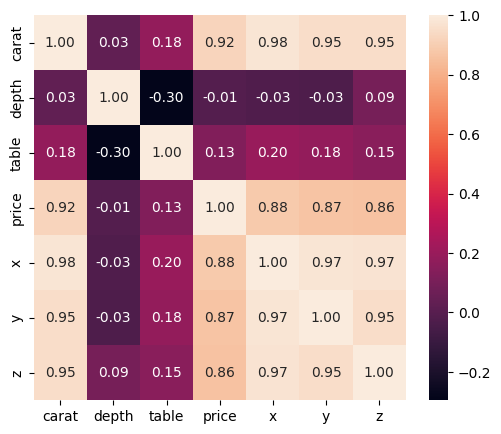

In [34]:
plt.figure(figsize=(6,5))
plot = sns.heatmap(corr_mtx, annot=True, fmt=".2f")